# Modeling the Ternary Classification Data

## Import necessary libraries and import csv

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, plot_confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import time
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [103]:
df = pd.read_csv('OutputData/Cleaned_data.csv')

In [104]:
df.head()

,amount_tsh,gps_height,longitude,latitude,region_code,population,construction_year,status_group,basin_Internal,basin_Lake Nyasa,...,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,6000.0,1390,34.938093,-9.856322,11,109,1999,1,0,1,...,1,0,0,0,1,0,0,0,0,0
1,0.0,1399,34.698766,-2.147466,20,280,2010,1,0,0,...,0,1,0,0,1,0,0,0,0,0
2,25.0,686,37.460664,-3.821329,21,250,2009,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0.0,263,38.486161,-11.155298,90,58,1986,2,0,0,...,1,0,0,0,0,1,0,0,0,0
4,20.0,0,39.172796,-4.765587,4,1,2009,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [105]:
y = df.status_group
X = df.drop('status_group', axis = 1)

## Define X and y variables, set up train test split, create scaled data, and SMOTE data for class imbalance

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [107]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)

In [108]:
smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(scaled_train, y_train)

## Create function to evaluate all models

In [109]:
def evaluator(X_train, y_train, X_test, y_test, df, target, model):
    start = time.time()
    model.fit(X_train, y_train)
    test_preds = model.predict(X_test)
    end = time.time()
    print("Model Time: {}".format(end-start))
    class_report = classification_report(y_test, test_preds)
    print("Precision Score: {}".format(precision_score(y_test, test_preds, average = 'macro')))
    print("Recall Score: {}".format(recall_score(y_test, test_preds, average = 'macro')))
    print("Accuracy Score: {}".format(accuracy_score(y_test, test_preds )))
    print("F1 Score: {}".format(f1_score(y_test, test_preds, average = 'macro')))
    
    print('Mean Absolute Error:', mean_absolute_error(y_test, test_preds))  
    print('Mean Squared Error:', mean_squared_error(y_test, test_preds))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, test_preds)))
    
    print('Mean Model Cross-Val Score (k=3):')
    print(cross_val_score(model, df, target, cv=3).mean())
    
    model_confusion_matrix = plot_confusion_matrix(model, X_test, y_test)
    return model_confusion_matrix, class_report

## Run baseline model and run the other models

Model Time: 45.69161653518677
Precision Score: 0.7045192914060415
Recall Score: 0.6226087623209972
Accuracy Score: 0.7834345522677348
F1 Score: 0.6470788139381236
Mean Absolute Error: 0.25985269414653056
Mean Squared Error: 0.34642718697506136
Root Mean Squared Error: 0.5885806546048394
Mean Model Cross-Val Score (k=3):
0.6680881858830219


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d83f429780>,
 '              precision    recall  f1-score   support\n\n           1       0.79      0.88      0.83      4339\n           2       0.79      0.73      0.76      2920\n           3       0.53      0.26      0.35       480\n\n    accuracy                           0.78      7739\n   macro avg       0.70      0.62      0.65      7739\nweighted avg       0.78      0.78      0.77      7739\n')

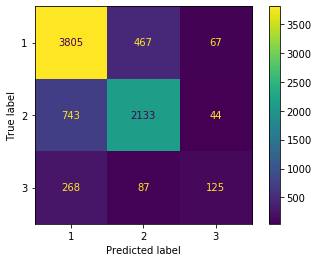

In [62]:
knn = KNeighborsClassifier()

evaluator(scaled_train, y_train, scaled_test, y_test, df, y, knn)

### Use a pipeline to integrate SMOTE into model for knn

Model Time: 93.35952115058899
Precision Score: 0.6222666481551958
Recall Score: 0.677500839260777
Accuracy Score: 0.7393720118878409
F1 Score: 0.6351068776570238
Mean Absolute Error: 0.3425507171469182
Mean Squared Error: 0.5063961752164362
Root Mean Squared Error: 0.7116151875953999
Mean Model Cross-Val Score (k=3):
0.5950479439662971


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d83f56deb8>,
 '              precision    recall  f1-score   support\n\n           1       0.83      0.75      0.79      4339\n           2       0.77      0.75      0.76      2920\n           3       0.27      0.53      0.35       480\n\n    accuracy                           0.74      7739\n   macro avg       0.62      0.68      0.64      7739\nweighted avg       0.77      0.74      0.75      7739\n')

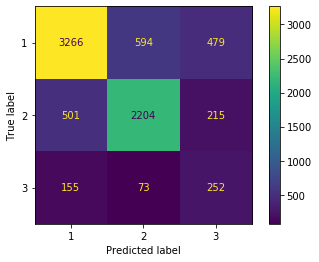

In [63]:
knnpipeline = make_pipeline(smt, knn)
evaluator(scaled_train, y_train, scaled_test, y_test, df, y, knnpipeline)

Model Time: 0.22851872444152832
Precision Score: 0.5426735415332566
Recall Score: 0.5833045972021834
Accuracy Score: 0.5797906706292802
F1 Score: 0.505820265220917
Mean Absolute Error: 0.5951673342809148
Mean Squared Error: 0.9450833441013051
Root Mean Squared Error: 0.9721539713961493
Mean Model Cross-Val Score (k=3):
0.9870512522292006


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d83fdab320>,
 '              precision    recall  f1-score   support\n\n           1       0.75      0.60      0.67      4339\n           2       0.74      0.54      0.62      2920\n           3       0.14      0.61      0.22       480\n\n    accuracy                           0.58      7739\n   macro avg       0.54      0.58      0.51      7739\nweighted avg       0.71      0.58      0.62      7739\n')

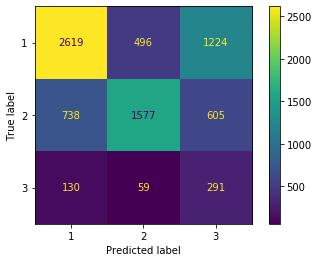

In [39]:
gb = GaussianNB()
evaluator(X_train, y_train, X_test, y_test, df, y, gb)

Model Time: 0.6715805530548096
Precision Score: 0.6356894377773399
Recall Score: 0.6385099367774419
Accuracy Score: 0.7625016151957618
F1 Score: 0.6370338631791794
Mean Absolute Error: 0.2969375888357669
Mean Squared Error: 0.41581599689882415
Root Mean Squared Error: 0.6448379617383146
Mean Model Cross-Val Score (k=3):
1.0


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d840c117b8>,
 '              precision    recall  f1-score   support\n\n           1       0.81      0.81      0.81      4339\n           2       0.77      0.76      0.76      2920\n           3       0.33      0.35      0.34       480\n\n    accuracy                           0.76      7739\n   macro avg       0.64      0.64      0.64      7739\nweighted avg       0.76      0.76      0.76      7739\n')

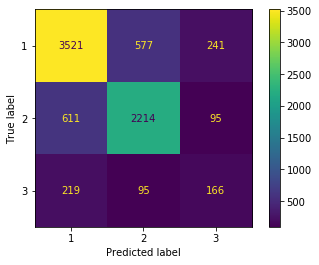

In [110]:
dt = DecisionTreeClassifier()
evaluator(X_train, y_train, X_test, y_test, df, y, dt)

In [41]:
dtr = DecisionTreeRegressor()
evaluator(X_train, y_train, X_test, y_test, df, y, dtr)

Model Time: 0.7512326240539551
Precision Score: 0.6207868917316023
Recall Score: 0.6251226859817667
Accuracy Score: 0.7546194598785373
F1 Score: 0.6228121611614984
Mean Absolute Error: 0.30805013567644396
Mean Squared Error: 0.4333893267864065
Root Mean Squared Error: 0.6583231173112536
Mean Model Cross-Val Score (k=3):
1.0


ValueError: plot_confusion_matrix only supports classifiers

Model Time: 1.7777040004730225
Precision Score: 0.7106534068889774
Recall Score: 0.5264179429218483
Accuracy Score: 0.7298100529784209
F1 Score: 0.546356385835339
Mean Absolute Error: 0.31864581987336865
Mean Squared Error: 0.41555756557694795
Root Mean Squared Error: 0.6446375458945499
Mean Model Cross-Val Score (k=3):
1.0


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d83fbab198>,
 '              precision    recall  f1-score   support\n\n           1       0.71      0.92      0.80      4339\n           2       0.81      0.54      0.65      2920\n           3       0.62      0.11      0.19       480\n\n    accuracy                           0.73      7739\n   macro avg       0.71      0.53      0.55      7739\nweighted avg       0.74      0.73      0.71      7739\n')

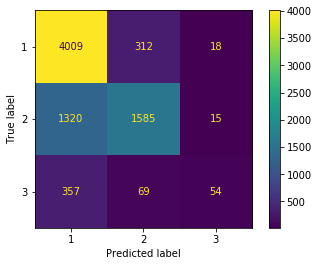

In [42]:
bagged_tree = BaggingClassifier(DecisionTreeClassifier(max_depth=5))

evaluator(X_train, y_train, X_test, y_test, df, y, bagged_tree)

Model Time: 1.4909641742706299
Precision Score: 0.5299297491313931
Recall Score: 0.48234889885828963
Accuracy Score: 0.7251582891846492
F1 Score: 0.4739664771641204
Mean Absolute Error: 0.3319550329499935
Mean Squared Error: 0.446181677219279
Root Mean Squared Error: 0.6679683205207257
Mean Model Cross-Val Score (k=3):


C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.900054276188261


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d83f92c860>,
 '              precision    recall  f1-score   support\n\n           1       0.68      0.98      0.80      4339\n           2       0.91      0.47      0.62      2920\n           3       0.00      0.00      0.00       480\n\n    accuracy                           0.73      7739\n   macro avg       0.53      0.48      0.47      7739\nweighted avg       0.72      0.73      0.68      7739\n')

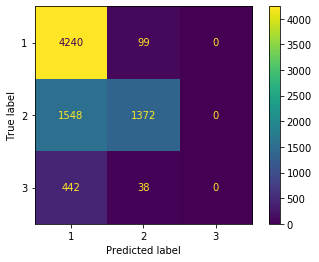

In [43]:
forest = RandomForestClassifier(max_depth= 5)
evaluator(X_train, y_train, X_test, y_test, df, y, forest)

Model Time: 4.3391945362091064
Precision Score: 0.6504760208054083
Recall Score: 0.5447750776732779
Accuracy Score: 0.7486755394753845
F1 Score: 0.5595848667109345
Mean Absolute Error: 0.30275229357798167
Mean Squared Error: 0.4056079596847138
Root Mean Squared Error: 0.6368735821846544
Mean Model Cross-Val Score (k=3):
1.0


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d83f8a0a90>,
 '              precision    recall  f1-score   support\n\n           1       0.74      0.90      0.81      4339\n           2       0.79      0.64      0.71      2920\n           3       0.42      0.10      0.16       480\n\n    accuracy                           0.75      7739\n   macro avg       0.65      0.54      0.56      7739\nweighted avg       0.74      0.75      0.73      7739\n')

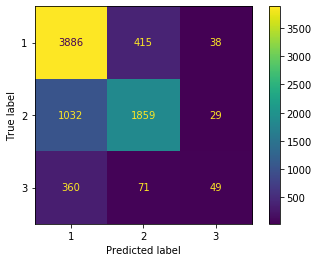

In [44]:
adaboost_clf = AdaBoostClassifier()
evaluator(X_train, y_train, X_test, y_test, df, y, adaboost_clf)

Model Time: 38.56742000579834
Precision Score: 0.7338873450854028
Recall Score: 0.5848228392411329
Accuracy Score: 0.7736141620364388
F1 Score: 0.6124697103102779
Mean Absolute Error: 0.27109445664814574
Mean Squared Error: 0.3605116940173149
Root Mean Squared Error: 0.6004262602662502
Mean Model Cross-Val Score (k=3):
1.0


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d83fddaf98>,
 '              precision    recall  f1-score   support\n\n           1       0.76      0.91      0.83      4339\n           2       0.82      0.66      0.73      2920\n           3       0.62      0.18      0.28       480\n\n    accuracy                           0.77      7739\n   macro avg       0.73      0.58      0.61      7739\nweighted avg       0.77      0.77      0.76      7739\n')

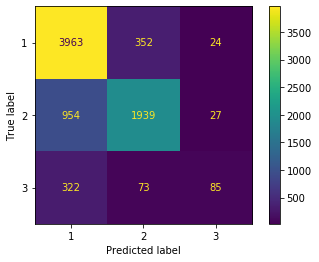

In [45]:
gbt_clf = GradientBoostingClassifier()
evaluator(X_train, y_train, X_test, y_test, df, y, gbt_clf)

## Tune best models, decision tree and knn

Model Time: 3.181591510772705
Precision Score: 0.6227381981236785
Recall Score: 0.6369852577749575
Accuracy Score: 0.7533273032691562
F1 Score: 0.6288574139322353
Mean Absolute Error: 0.3130895464530301
Mean Squared Error: 0.4459232458974028
Root Mean Squared Error: 0.6677748467091306
Mean Model Cross-Val Score (k=3):
1.0


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d8420e6da0>,
 '              precision    recall  f1-score   support\n\n           1       0.81      0.79      0.80      4339\n           2       0.76      0.76      0.76      2920\n           3       0.30      0.36      0.32       480\n\n    accuracy                           0.75      7739\n   macro avg       0.62      0.64      0.63      7739\nweighted avg       0.76      0.75      0.76      7739\n')

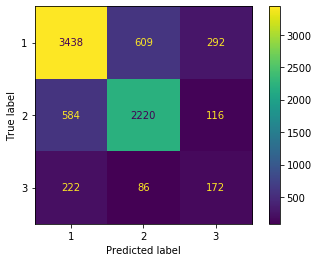

In [111]:
pipeline = make_pipeline(smt, dt)
evaluator(X_train, y_train, X_test, y_test, df, y, pipeline) ## Create dt model with pipeline to include SMOTE

In [112]:
dt_params = { 
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [None, 5, 10, 15,],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [2,5,10]}

Model Time: 422.87268233299255
Precision Score: 0.6479685911846085
Recall Score: 0.6340578403268223
Accuracy Score: 0.7710298488176767
F1 Score: 0.6403015277174756
Mean Absolute Error: 0.28685876728259463
Mean Squared Error: 0.40263599948313733
Root Mean Squared Error: 0.6345360505780088
Mean Model Cross-Val Score (k=3):
1.0


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d840d7e668>,
 '              precision    recall  f1-score   support\n\n           1       0.80      0.84      0.82      4339\n           2       0.79      0.74      0.77      2920\n           3       0.35      0.32      0.34       480\n\n    accuracy                           0.77      7739\n   macro avg       0.65      0.63      0.64      7739\nweighted avg       0.77      0.77      0.77      7739\n')

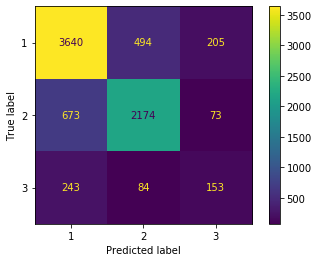

In [113]:
dt_grid_search = GridSearchCV(pipeline, dt_params, cv=3, return_train_score=True)
evaluator(X_train, y_train, X_test, y_test, df, y, dt_grid_search)

In [114]:
dt_grid_search.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': None,
 'decisiontreeclassifier__min_samples_leaf': 2,
 'decisiontreeclassifier__min_samples_split': 2}

In [115]:
dt_params2 = { 
    'decisiontreeclassifier__criterion': ['gini'],
    'decisiontreeclassifier__max_depth': [None],
    'decisiontreeclassifier__min_samples_split': [2],
    'decisiontreeclassifier__min_samples_leaf': [10,15,20]}

Model Time: 21.15097403526306
Precision Score: 0.6457407374008549
Recall Score: 0.6584652647766901
Accuracy Score: 0.7648274970926476
F1 Score: 0.650342806123151
Mean Absolute Error: 0.2993926863935909
Mean Squared Error: 0.427833053366068
Root Mean Squared Error: 0.6540894842191456
Mean Model Cross-Val Score (k=3):
1.0


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d86b3b5c18>,
 '              precision    recall  f1-score   support\n\n           1       0.80      0.82      0.81      4339\n           2       0.80      0.74      0.76      2920\n           3       0.34      0.42      0.37       480\n\n    accuracy                           0.76      7739\n   macro avg       0.65      0.66      0.65      7739\nweighted avg       0.77      0.76      0.77      7739\n')

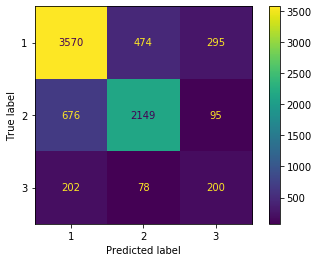

In [116]:
dt_grid_search2 = GridSearchCV(pipeline, dt_params2, cv=3, return_train_score=True)
evaluator(X_train, y_train, X_test, y_test, df, y, dt_grid_search2)

Trying the model without the pipeline to see how the pipeline affects the outcome. Taking away the pipeline(SMOTE) did not improve the model which indicates that the pipeline does help with some class imbalance

Model Time: 79.87228226661682
Precision Score: 0.6983294109396264
Recall Score: 0.6135990238265872
Accuracy Score: 0.7798165137614679
F1 Score: 0.6386671887865089
Mean Absolute Error: 0.26631347719343584
Mean Squared Error: 0.3585734591032433
Root Mean Squared Error: 0.598810035907251
Mean Model Cross-Val Score (k=3):
1.0


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d86b6028d0>,
 '              precision    recall  f1-score   support\n\n           1       0.78      0.89      0.83      4339\n           2       0.82      0.70      0.75      2920\n           3       0.50      0.25      0.33       480\n\n    accuracy                           0.78      7739\n   macro avg       0.70      0.61      0.64      7739\nweighted avg       0.77      0.78      0.77      7739\n')

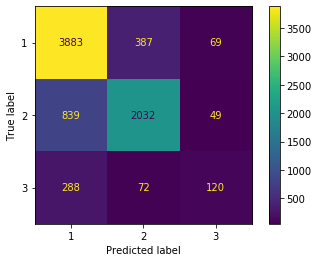

In [118]:
dt_params3 = { 
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15,],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2,5,10]}
dt_grid_search3 = GridSearchCV(dt, dt_params3, cv=3, return_train_score=True)
evaluator(X_train, y_train, X_test, y_test, df, y, dt_grid_search3)

In [84]:
dt_grid_search.best_params_  

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': None,
 'decisiontreeclassifier__min_samples_leaf': 2,
 'decisiontreeclassifier__min_samples_split': 10}

### Finalizing the best params for the decision tree

Model Time: 3.0388596057891846
Precision Score: 0.6539190665359614
Recall Score: 0.6430726740198889
Accuracy Score: 0.7719343584442434
F1 Score: 0.6480633873631786
Mean Absolute Error: 0.28453288538570876
Mean Squared Error: 0.39746737304561314
Root Mean Squared Error: 0.6304501352570345
Mean Model Cross-Val Score (k=3):
1.0


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d84220f550>,
 '              precision    recall  f1-score   support\n\n           1       0.80      0.83      0.82      4339\n           2       0.79      0.75      0.77      2920\n           3       0.37      0.35      0.36       480\n\n    accuracy                           0.77      7739\n   macro avg       0.65      0.64      0.65      7739\nweighted avg       0.77      0.77      0.77      7739\n')

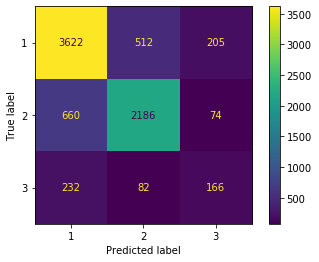

In [85]:
bestDt = DecisionTreeClassifier(criterion= 'gini',
 max_depth= None,
 min_samples_leaf= 2,
 min_samples_split= 10)
dtPipeline = make_pipeline(smt, bestDt)
evaluator(X_train, y_train, X_test, y_test, df, y, dtPipeline)

Using GridSearchCV with Knn proved to take too long, so using information learned from the binary model I tested out different combinations of paramaters for Knn

Model Time: 43.23424935340881
Precision Score: 0.6858684960646771
Recall Score: 0.6512534298316602
Accuracy Score: 0.7945470991084119
F1 Score: 0.665286858798739
Mean Absolute Error: 0.2541672050652539
Mean Squared Error: 0.3515958134125856
Root Mean Squared Error: 0.5929551529522158
Mean Model Cross-Val Score (k=3):
0.7298338114807063


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d8421f07b8>,
 '              precision    recall  f1-score   support\n\n           1       0.81      0.87      0.84      4339\n           2       0.81      0.76      0.79      2920\n           3       0.43      0.32      0.37       480\n\n    accuracy                           0.79      7739\n   macro avg       0.69      0.65      0.67      7739\nweighted avg       0.79      0.79      0.79      7739\n')

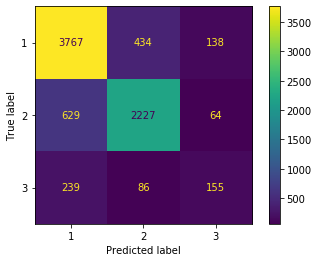

In [88]:
knn1 =  KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')

evaluator(scaled_train, y_train, scaled_test, y_test, df, y, knn1)

Model Time: 40.83776330947876
Precision Score: 0.6734990668648483
Recall Score: 0.6467392022129124
Accuracy Score: 0.7882155317224447
F1 Score: 0.6579769512925099
Mean Absolute Error: 0.2625662230262308
Mean Squared Error: 0.3641297325235819
Root Mean Squared Error: 0.6034316303638565
Mean Model Cross-Val Score (k=3):
0.7241735804192189


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d8406aa630>,
 '              precision    recall  f1-score   support\n\n           1       0.81      0.85      0.83      4339\n           2       0.80      0.77      0.78      2920\n           3       0.41      0.32      0.36       480\n\n    accuracy                           0.79      7739\n   macro avg       0.67      0.65      0.66      7739\nweighted avg       0.78      0.79      0.78      7739\n')

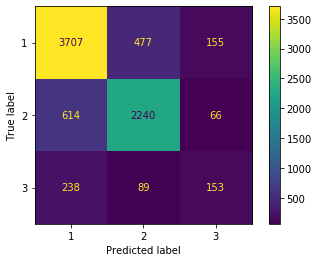

In [82]:
knn2 =  KNeighborsClassifier(n_neighbors=5, p=1, weights='distance')

evaluator(scaled_train, y_train, scaled_test, y_test, df, y, knn2)

Model Time: 43.84095740318298
Precision Score: 0.7080920428675395
Recall Score: 0.61545653286903
Accuracy Score: 0.7829176896239824
F1 Score: 0.6413465110441153
Mean Absolute Error: 0.2610156350949735
Mean Squared Error: 0.3488822845328854
Root Mean Squared Error: 0.5906625809486202
Mean Model Cross-Val Score (k=3):
0.711767594531028


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d8406859e8>,
 '              precision    recall  f1-score   support\n\n           1       0.78      0.89      0.83      4339\n           2       0.81      0.71      0.76      2920\n           3       0.54      0.24      0.34       480\n\n    accuracy                           0.78      7739\n   macro avg       0.71      0.62      0.64      7739\nweighted avg       0.78      0.78      0.77      7739\n')

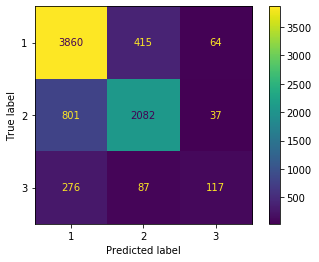

In [86]:
knn3 =  KNeighborsClassifier(n_neighbors=9, p=1, weights='uniform')

evaluator(scaled_train, y_train, scaled_test, y_test, df, y, knn3)

Model Time: 47.8059983253479
Precision Score: 0.6793864774858746
Recall Score: 0.6408830540533051
Accuracy Score: 0.7880863160615067
F1 Score: 0.6559285123675201
Mean Absolute Error: 0.26024034112934485
Mean Squared Error: 0.35689365551104796
Root Mean Squared Error: 0.5974057712401579
Mean Model Cross-Val Score (k=3):
0.6813212374970924


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d842217748>,
 '              precision    recall  f1-score   support\n\n           1       0.81      0.86      0.83      4339\n           2       0.80      0.75      0.78      2920\n           3       0.43      0.30      0.36       480\n\n    accuracy                           0.79      7739\n   macro avg       0.68      0.64      0.66      7739\nweighted avg       0.78      0.79      0.78      7739\n')

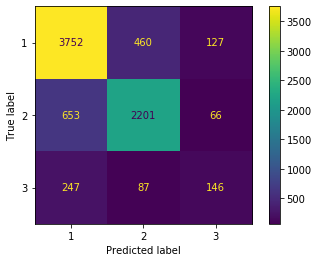

In [91]:
knn4 =  KNeighborsClassifier(n_neighbors=9, p=2, weights='distance')

evaluator(scaled_train, y_train, scaled_test, y_test, df, y, knn4)

Model Time: 97.28050518035889
Precision Score: 0.6273869682204726
Recall Score: 0.6814048006418022
Accuracy Score: 0.7449282853081793
F1 Score: 0.6399312080991596
Mean Absolute Error: 0.3353146401343843
Mean Squared Error: 0.49580049101951157
Root Mean Squared Error: 0.7041310183620031
Mean Model Cross-Val Score (k=3):
0.596211005143315


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d840b37e10>,
 '              precision    recall  f1-score   support\n\n           1       0.83      0.77      0.80      4339\n           2       0.78      0.75      0.76      2920\n           3       0.27      0.53      0.36       480\n\n    accuracy                           0.74      7739\n   macro avg       0.63      0.68      0.64      7739\nweighted avg       0.78      0.74      0.76      7739\n')

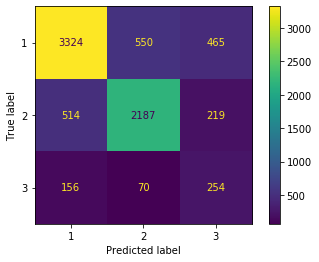

In [119]:
knnpipeline1 = make_pipeline(smt, knn4)
evaluator(scaled_train, y_train, scaled_test, y_test, df, y, knnpipeline1)

### Finalizing the best KNN Model

Model Time: 94.22489356994629
Precision Score: 0.6423696696750122
Recall Score: 0.6887440418623627
Accuracy Score: 0.7614678899082569
F1 Score: 0.6566311068380157
Mean Absolute Error: 0.30972993926863934
Mean Squared Error: 0.4521255976224318
Root Mean Squared Error: 0.6724028536691615
Mean Model Cross-Val Score (k=3):
0.6645731565480344


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1d84220feb8>,
 '              precision    recall  f1-score   support\n\n           1       0.83      0.79      0.81      4339\n           2       0.79      0.77      0.78      2920\n           3       0.31      0.51      0.39       480\n\n    accuracy                           0.76      7739\n   macro avg       0.64      0.69      0.66      7739\nweighted avg       0.78      0.76      0.77      7739\n')

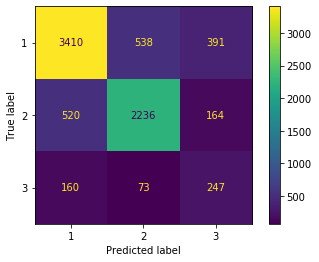

In [89]:
knnpipeline1 = make_pipeline(smt, knn1)
evaluator(scaled_train, y_train, scaled_test, y_test, df, y, knnpipeline1) 

## Viewing Feature Importance

In [101]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,25))
    plt.barh(range(n_features), model.feature_importances_) 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance for Ternary Decision Tree')


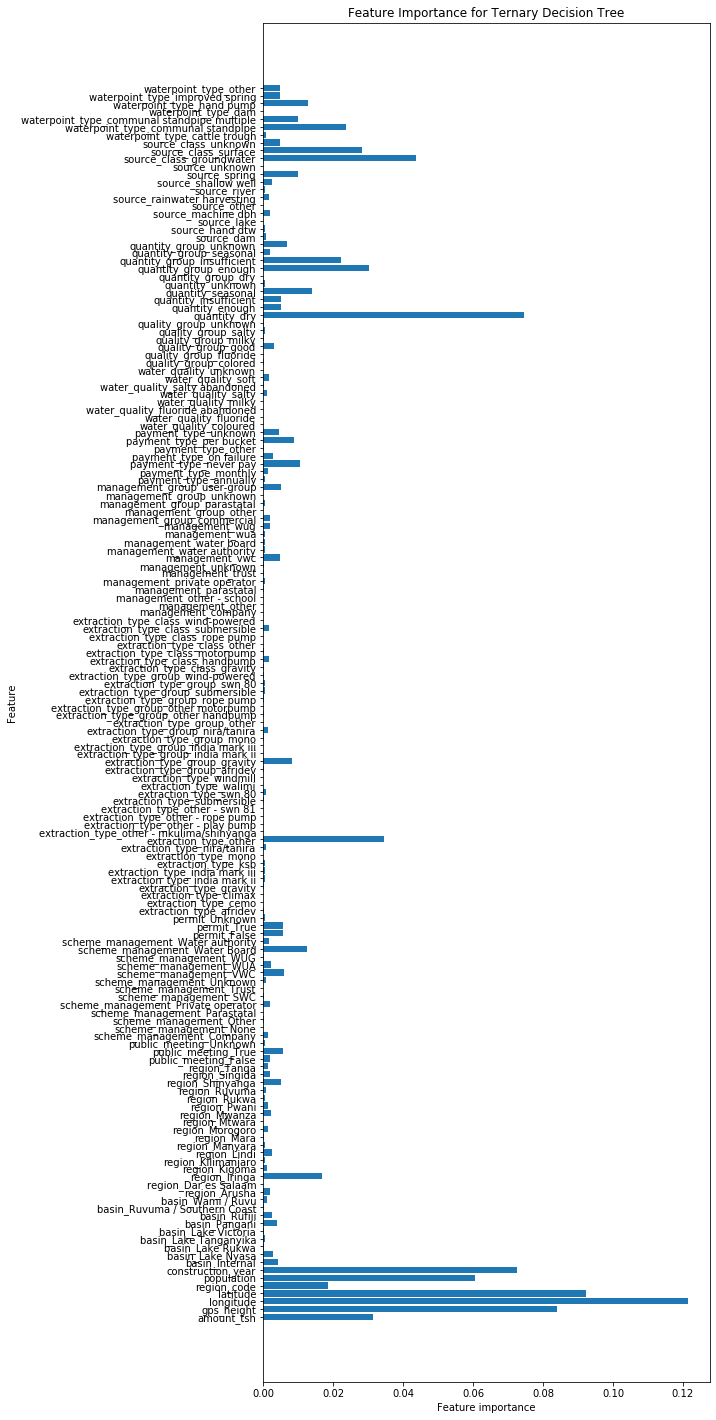

In [102]:
plot_feature_importances(bestDt)